In [8]:
# Elementos de matriz y funciones personalizadas
from H2.elementos_matriz import *
import matplotlib.pyplot as plt

# Gráficas H$_2$
---

In [9]:
# Energía del átomo de hidrógeno en la base STO-3G
RB = np.array([1000000, 0, 0])
EH_STO3G = fpp(1, d, a, RA, RB, ZA, ZB)
print("Energía hidrógeno:", EH_STO3G)

Energía hidrógeno: -0.4665910279627299


In [10]:
# cargar elementos de matriz previamente calculados
distancias, h11, h22, J11, J22, J12, K12, hnuc = elementos_H2('cargar')

Elementos de matriz y distancias interatómicas cargadas.


In [11]:
# Energía Hartree-Fock restringida
RHF1 = cargar('H2_STO3G_RHF1')
RHF2 = cargar('H2_STO3G_RHF2')

# Energía Hartree-Fock sin restricción
UHF1 = cargar('H2_STO3G_UHF1')
UHF2 = cargar('H2_STO3G_UHF2')

# Energía CI
CI1 = cargar('H2_STO3G_CI1')
CI2 = cargar('H2_STO3G_CI2')

In [12]:
x0, y0 = 2.2, -1.0154782413729193

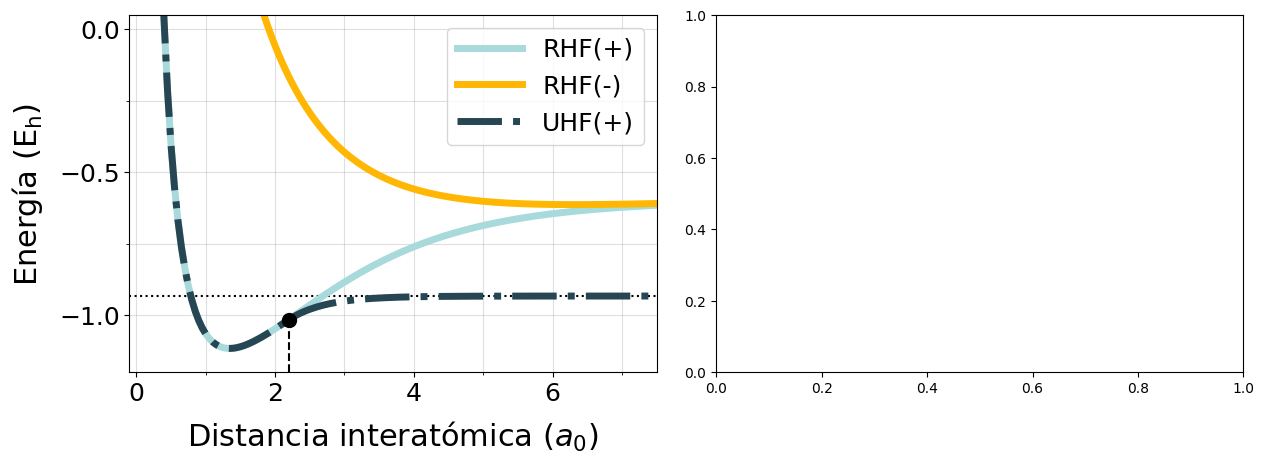

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(13, 5))  # 1 fila, 1 columnas, tamaño de figura (15, 5)
linewidth, fontsize, labelsize, alpha = 5, 22, 18, 0.4

###################
### Gráfica derecha
###################
xmin, xmax = -0.1, 7.5
ymin, ymax = -1.2, 0.05
# plots
axs[0].axhline(y = 2*EH_STO3G, color='black', linestyle='dotted') # energía base 2 átomos de hidrógeno (STO-3G)
axs[0].plot(distancias, RHF1, label='RHF(+)', linestyle='solid', linewidth=linewidth, color='#a8dadc') # energías RHF orbital ligante
axs[0].plot(distancias[3:], RHF2[3:], label='RHF(-)', linestyle='solid', linewidth=linewidth, color='#ffb703') # energías RHF orbital antiligante
axs[0].plot(distancias, UHF1, label='UHF(+)', linestyle='dashdot', linewidth=linewidth, color='#264653') # energías UHF(+)
# axs[0].plot(distancias, UHF2, label='UHF(-)', linestyle='dotted', linewidth=linewidth, color='#e63946') # energías UHF(-)
# breaking point
axs[0].vlines(x=x0, ymin=ymin, ymax=y0, color='black', linestyle='dashed')
axs[0].plot(x0, y0, ls="", marker="o", color='black', markersize=10) # punto a partir de donde RHF y UHF ya no son iguales
# x config
axs[0].set_xlim(xmin, xmax)
axs[0].set_xlabel('Distancia interatómica ($a_0$)', fontsize=fontsize, labelpad=10)
axs[0].set_xticks(np.arange(0, xmax, 2))
axs[0].set_xticks(np.arange(0, xmax, 1), minor=True)
# y config
axs[0].set_ylim(ymin, ymax)
axs[0].set_ylabel(r'Energía ($\text{E}_\text{h}$)', fontsize=fontsize, labelpad=10)
axs[0].set_yticks(np.arange(-1, ymax, 0.50))
axs[0].set_yticks(np.arange(-1, ymax, 0.25), minor=True)
# plot config
axs[0].legend(fontsize=18, handlelength=2.6)
axs[0].tick_params(axis='both', which='major', labelsize=labelsize)
axs[0].grid(alpha=alpha, which='both')

#####################
### Gráfica izquierda
#####################

fig.tight_layout(pad=2)
plt.show()
fig.savefig('imgs/H2_STO3G_RHFvsUHF.svg', format='svg', bbox_inches='tight')

In [18]:
# distancias interatomicas
R_Wolniewicz = np.array([0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 4.0, 4.5, 5.0, 6.0, 8.0])

# Energía (radios de Bohr)
E_Wolniewicz = np.array([-0.769635427887, -1.020056664330, -1.124539718008, -1.164935241876, 
              -1.174475713565, -1.168583371916, -1.155068736046, -1.138132955488, 
              -1.120132112181, -1.102422601703, -1.085791233366, -1.070683223812, 
              -1.057326265285, -1.045799653502, -1.016390251364, -1.007993728135, 
              -1.003785657939, -1.000835707231, -1.000055604837])

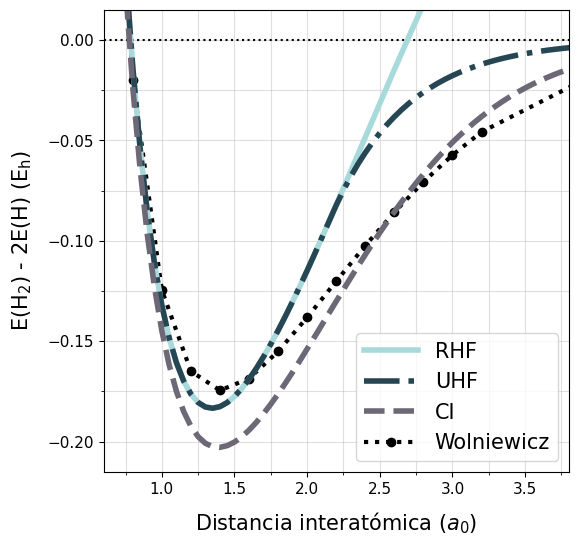

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))  # 1 fila, 1 columnas, tamaño de figura (15, 5)
linewidth, fontsize, labelsize, alpha = 4, 15, 11, 0.4

ax.axhline(0, color='black', linestyle='dotted') # energía base 2 átomos de hidrógeno (STO-3G)
ax.plot(R_Wolniewicz, E_Wolniewicz-2*(-0.5), linewidth=3, linestyle='dotted', label='Wolniewicz', color='black', marker='o')
ax.plot(distancias, RHF1-2*EH_STO3G, linewidth=linewidth, linestyle='solid', label='RHF', color='#a8dadc')
ax.plot(distancias, UHF1-2*EH_STO3G, linewidth=linewidth, linestyle='dashdot', label='UHF', color='#264653')
ax.plot(distancias, CI1-2*EH_STO3G, linewidth=linewidth, linestyle='dashed', label='CI', color='#6d6875')

# x config
xmin, xmax = 0.6, 3.8
ax.set_xticks(np.arange(0, xmax, 0.5))
ax.set_xticks(np.arange(0, xmax, 0.25), minor=True)
ax.set_xlim(xmin, xmax)
ax.set_xlabel('Distancia interatómica ($a_0$)', fontsize=fontsize, labelpad=10)
# y config
ymin, ymax = -0.215, 0.015
ax.set_yticks(np.arange(-0.3, ymax, 0.05))
ax.set_yticks(np.arange(-0.3, ymax, 0.025), minor=True)
ax.set_ylim(ymin, ymax)
ax.set_ylabel(r'E(H$_2$) - 2E(H) (E$_\mathrm{h}$)', fontsize=fontsize, labelpad=10)
# plot configplt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
handles, labels = ax.get_legend_handles_labels()
order = [1, 2, 3, 0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=15, handlelength=2.6)
ax.grid(alpha=alpha, which='both')
ax.tick_params(axis='both', which='major', labelsize=labelsize)

# fig.tight_layout(pad=1)
plt.show()
fig.savefig('imgs/H2_STO3G_CI.svg', format='svg', bbox_inches='tight')